# Máquinas de soporte vectorial

Una máquina de soporte vectorial (*support vector machine, SVM*) es un modelo de aprendizaje supervisado que busca que un hiperplano óptimo 

$$
h(x) = \langle w, x \rangle + b
$$

para separar un conjunto de datos

$$
D = \{(x_1, y_1), (x_2, y_2), \ldots (x_N, y_N)\}
$$

donde $x_i \in \mathbb{R}^M$ con etiquetas $y_i \in \{-1, +1\}$.

Considere los siguientes hiperplanos separadores:

<img src="img/svm1.png" width="500">

Para la SVM el hiperplano óptimo es el de más a la derecha: aquel que tiene **máximo margen**.

Margen ($\tau$)
: Distancia del hiperplano a la muestra más cercana

A continuación veremos el problema de optimización planteado por la SVM para obtener el hiperplano óptimo.

## Formulación primal de la SVM

La formulación primal se obtiene definiendo las siguientes condiciones

- Para $y_i = +1$ se tiene $\langle w, x_i \rangle + b \geq 1$
- Para $y_i = -1$ se tiene $\langle w, x_i \rangle + b \leq 1$

que pueden escribirse como de forma resumida como

$$
y_i \left(\langle w, x_i \rangle + b\right) \geq 1
$$

donde llamamos **vectores de soporte** a los ejemplos $(x_i, y_i)$ que cumplen con

$$
y_i \left(\langle w, x_i \rangle + b\right) = 1
$$

:::{important}

Los vectores de soporte definen el hiperplano separador.

:::

<img src="img/svm2.png" width="400">

La figura muestra un hiperplano (linea negra) que separa datos de dos clases representados por puntos verdes y rojos, respectivamente.

- El ejemplo $x_1$ es un vector de soporte asociado a la clase $-1$
- Los ejemplos $x_2$, $x_3$ y $x_4$ son vectores de soporte de la clase $+1$
- El margen entre el hiperplano y los vectores de soporte es $\tau = \frac{1}{\|w\|}$


Considerando las ecuaciones anteriores como restricciones y planteando el objetivo de maximizar el margen se tiene la formulación primal de la SVM:

$$
\begin{split}
\min_{w,b} &\frac{1}{2}\|w\|^2 \\
\text{sujeto a: }& y_i \left(\langle w, x_i \rangle + b\right) \geq 1,  \forall i
\end{split}
$$

Este problema se resuelve utilizando multiplicadores de Lagrange.

**Ejercicio propuesto:** Plantee las restricciones de la formulación primal para los datos de la figura anterior y despeje el valor de $w$ y $b$. Solución: $w= (1,1)$ y $b=-1$.



## Formulación dual de la SVM

A partir de la formulación primal podemos definir el lagrangiano como

$$
L(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^N \alpha_i \left [ y_i \left(\langle w, x_i \rangle + b\right) - 1 \right]
$$

donde $\alpha_i$ son los multiplicadores de Lagrange.

Derivando en función de $w$ y $b$ e igualando a cero tenemos

$$
\sum_{i=1}^N \alpha_i y_i = 0
$$

y

$$
w = \sum_{i=1}^N \alpha_i y_i x_i
$$


Reemplazando esta definición de $w$ en el lagrangiano se obtiene la formulación dual de la SVM:

$$
\begin{split}
\max_\alpha \sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j\langle x_i, x_j \rangle \\
\text{sujeto a:} &\sum_{i=1}^N \alpha_i y_i = 0 \\
&\alpha_i \geq 0, \forall i
\end{split}
$$

Por otra parte el hiperplano dual es 

$$
h(x) = \sum_{i=1}^N \alpha_i y_i \langle x, x_i \rangle + b 
$$

donde

$$
b = y_k - \langle w, x_k \rangle
$$

para algún $k$ tal que $\alpha_k > 0$.

:::{note}

Los vectores de soporte son los ejemplos donde $\alpha_i > 0$. En cambio para los ejemplos que no son vectores de soporte se tiene $\alpha_i=0$

:::

**Ejercicio:** Considere el dataset que se muestra en la siguiente figura:

<img src="img/svm3.png" width="300">

donde se han demarcado los vectores de soporte y el hiperplano de máxima separación. Obtenga los parámetros del hiperplano separador utilizando la formulación primal y luego la dual.

## Margen relajado de la SVM

Las formulaciones anteriores no consideran el caso en que existan errores, es decir ejemplos que quedan del lado contrario de la frontera de decisión.

Llamamos a estos ejemplos **no separables** y les asignamos una variable de compensación $\xi$ como muestra la siguiente figura:

<img src="img/svm4.png" width="300">

Con las variables de compensación, la formulación primal de la SVM cambia a:

$$
\begin{split}
\min_{w,b} &\frac{1}{2}\|w\|^2  + C \sum_{i=1}^N \xi_i \\
\text{sujeto a: }& y_i \left(\langle w, x_i \rangle + b\right) \geq 1 - \xi_i,  \forall i \\
&\xi_i \geq 0, \forall i
\end{split}
$$

donde se ha agregado $C>0$ que pondera la regularización de la función de costo. 

:::{note}

El hiperparámetro $C$ controla el trade-off entre la minimización del margen y la cantidad de ejemplos mal clasificados

- Un valor grande de $C$ privilegia un hiperplano de margen pequeño con pocos errores
- Un valor pequeño de $C$ privilegia un hiperplano de gran margen con muchos errores

:::

<img src="img/svm6.png" width="500">

Si consideramos $C$ la formulación dual cambia a:

$$
\begin{split}
\max_\alpha \sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j\langle x_i, x_j \rangle \\
\text{sujeto a:} &\sum_{i=1}^N \alpha_i y_i = 0 \\
&C > \alpha_i \geq 0, \forall i
\end{split}
$$

## Transformación no lineal de los datos

La SVM es capaz de encontrar fronteras lineales (hiperplanos) para separar los datos de entrenamiento, pero 

> ¿Qué ocurre si en primer lugar nuestros datos no son linealmente separables?

Considere el siguiente ejemplo donde las clases se agrupan  como dos circulos concéntricos:

In [1]:
import numpy as np
from sklearn.datasets import make_circles

np.random.seed(12345)
X, y = make_circles(noise=0.1, factor=0.1)

non_linear_transform = lambda x : np.stack((x[:, 0], x[:, 1], x[:, 0]**2 + x[:, 1]**2)).T

PhiX = non_linear_transform(X)

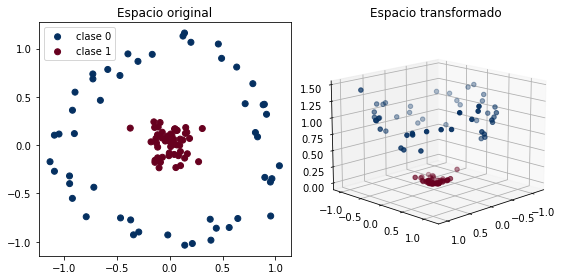

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.add_subplot(1, 2, 1)
for y_ in np.unique(y):
    ax.scatter(X[y==y_, 0], X[y==y_, 1], label=f'clase {y_}', 
               c=y[y==y_], cmap=plt.cm.RdBu_r, vmin=0, vmax=1)
ax.set_title('Espacio original')
ax.legend()
ax = fig.add_subplot(1, 2, 2, projection='3d')    
for y_ in np.unique(y):
    ax.scatter(PhiX[y==y_, 0], PhiX[y==y_, 1], PhiX[y==y_, 2],
               c=y[y==y_], cmap=plt.cm.RdBu_r, vmin=0, vmax=1)
ax.view_init(elev=15., azim=45)
ax.set_title('Espacio transformado');

La subfigura izquierda muestra los datos en su espacio original (dos dimensiones). Claramente no es posible separarlos con un hiperplano.

Considere ahora la siguiente transformación no lineal $\phi: \mathbb{R}^2 \to \mathbb{R}^3$ definida como

$$
\phi(x) = (x_1, x_2, x_1^2 + x_2^2)
$$


La subfigura derecha muestra los datos en el espacio transformado (tres dimensiones). En este espacio si se pueden separar por un hiperplano.


:::{note}

Generalmente es más fácil encontrar hiperplanos separadores (lineales) en espacios aumentados. El hiperplano en el espacio aumentado corresponde a una frontera no lineal en el espacio de entrada.

:::

## Kernels y SVM

Un kernel ([definido positivo](https://es.wikipedia.org/wiki/Matriz_definida_positiva)) es un producto interno en un espacio de features implícito y generalmente de alta dimensionalidad.

Un kernel $\kappa: \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ cumple lo siguiente

$$
\kappa(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

donde $\phi$ es una transformación no lineal que es inducida por el kernel

:::{note}

La ecuación anterior se conoce como el **truco del kernel**

:::

Veamos dos kernels ampliamente utilizados. El primero es el kernel polinomial con hiperparámetros $c_0$, $d$ y $\gamma>0$

$$
\kappa(x_i, x_j) = (c_0 + \gamma \langle x_i, x_j \rangle)^d
$$


Por ejemplo para $d=2$, $c_0=1$, $\gamma=1$ y $x_i \in \mathbb{R}$ este kernel induce una transformación no lineal

$$
\begin{split}
\kappa(x_i, x_j) &= (1 + x_i x_j)^2 = 1 + 2 x_i x_j + x_i^2 x_j^2 \\&= \left\langle \begin{pmatrix} 1\\ \sqrt{2} x_i \\ x_i^2 \end{pmatrix}, \begin{pmatrix} 1\\ \sqrt{2} x_j \\ x_j^2 \end{pmatrix} \right\rangle
\end{split}
$$

El segundo es el kernel gaussiano o RBF (*radial basis function*) con hiperparámetro $\gamma>0$

$$
\kappa(x_i, x_j) = \exp \left(-\gamma \| x_i -  x_j \|^2 \right),
$$

cuyo transformación no lineal inducida es

$$
\begin{split}
\kappa(x_i, x_j) &= \exp \left(-\gamma \| x_i\|^2 \right) \exp \left(-\gamma \| x_j\|^2 \right) \exp \left(\gamma \langle x_i, x_j \rangle \right) \\
&= \exp \left(-\gamma \| x_i\|^2 \right) \exp \left(-\gamma \| x_j\|^2 \right) \sum_{k=1}^\infty  \frac{\left(\gamma \langle x_i, x_j \rangle \right)^k}{k!} 
\end{split}
$$

:::{note}

El espacio inducido por el kernel RBF es de dimensionalidad infinita

:::

:::{warning}

Controlando $\gamma$ es muy fácil obtener un espacio donde los datos sean linealmente separables, sin embargo esto puede inducir a sobreajuste, como muestra la siguiente figura

:::


<img src="img/svm5.png" width="500">


- En la subfigura izquierda se ha utilizado un valor de $\gamma$ pequeño (hiperplano poco flexible)
- En la subfigura derecha se ha utilizado un valor de $\gamma$ grande (hiperplano muy flexible)

:::{hint}

Cuando utilizamos kernels, el hiperparámetro $C$ cobra mayor relevancia. Utilizando un valor de $C$ pequeño privilegiamos un hiperplano más suave (menos complejo) con margen ancho (regularización).

:::

:::{warning}

Los hiperparámetros de la SVM, como $\gamma$ y $C$, son sensibles. Debemos calibrarlos utilizando técnicas de validación.

:::

Utilizando el **truco del kernel** no es necesario conocer la transformación no lineal $\phi$. Basta reemplazar $\langle \phi(x_i), \phi(x_j) \rangle$ por $\kappa(x_i, x_j)$ en la formulación dual de la SVM como se muestra a continuación:


$$
\begin{split}
\max_\alpha \sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \kappa(x_i, x_j)\\
\text{sujeto a:} &\sum_{i=1}^N \alpha_i y_i = 0 \\
&C > \alpha_i \geq 0, \forall i
\end{split}
$$

y el hiperplano utilizando kernels es:

$$
h(x) = \sum_{i=1}^N \alpha_i y_i \kappa(x, x_i) + b 
$$



## SVM para clasificación con scikit-learn

La librería scikit-learn tiene implementaciónes de la SVM para clasificación y para regresión. La clase de SVM para clasificación es [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Sus argumentos principales son

- `C`: El hiperparámetro de regularización
- `kernel`: Las opciones son 
    - `linear`: Sin kernel
    - `poly`: Kernel polinomial (se debe especificar `degree` y `coef0`)
    - `rbf`: Kernel Gaussiano (se debe especificar `gamma`
    - Una función de Python que corresponda a un kernel matemáticamente válido
- `gamma`, `degree`, `coef0`: Los hiperparámetros de los kernels
- `tol`: Tolerancia para el criterio de detención del algoritmo
- `probability`: Booleano que especifica si se deben calcular probabilidades (aumenta el costo  computacional)

Sus métodos principales son

- `fit(X,y)`: Entrena la SVM
- `predict(X)`: Retorna predicción dura de `X`
- `predict_proba(X)`: Retorna la predicción probabilística de `X` (sólo si `probability=True`)
- `get_params()`: Retorna un diccionario con los nombres y valores de los parámetros de la SVM y del kernel
- `score(X, y)`: Retorna el *accuraccy* promedio del modelo
- `decision_function(X)`: Retorna la frontera de decisión evaluada en `X`

El resultado para el ejemplo anterior utilizando un kernel lineal es:

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), 
                      SVC(kernel='linear'))

model.fit(X, y);

:::{hint}

Se recomienda estandarizar los datos antes de entrenar la SVM para facilitar la optimización numérica.

:::

Con `decision_function` podemos visualizar la frontera de decisión el espacio original. En este caso un kernel lineal es claramente inapropiado para el problema.

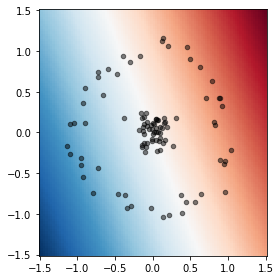

In [4]:
def plot_decision_boundary(model, ax, xmin=-1.5, xmax=1.5, title=None):
    x = np.linspace(xmin, xmax, num=100)
    xx, yy = np.meshgrid(x, x)
    hiperplane = model.decision_function(np.stack((xx.ravel(), yy.ravel())).T).reshape(xx.shape)
    
    ax.pcolormesh(xx, yy, hiperplane, cmap=plt.cm.RdBu_r)
    ax.scatter(X[:, 0], X[:,1], c='k', alpha=0.5, s=20)
    if title is not None:
        ax.set_title(title)
    
fig, ax = plt.subplots(figsize=(4, 4), tight_layout=True)
plot_decision_boundary(model, ax)

Intentemos ahora con un kernel Gaussiano y veamos la influencia de `gamma` en el hiperplano separador:

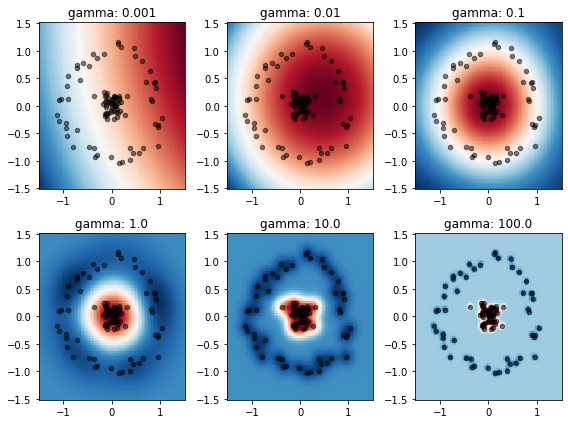

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

fig, ax = plt.subplots(2, 3, figsize=(8, 6), tight_layout=True)

for ax_, gamma_ in zip(ax.ravel(), [0.001, 0.01, 0.1, 1.0, 10., 100.]):
    model = make_pipeline(StandardScaler(), 
                          SVC(C=1, kernel='rbf', gamma=gamma_))

    model.fit(X, y)
    plot_decision_boundary(model, ax_, title=f'gamma: {gamma_}')

:::{note}

Un valor pequeño de $\gamma$ produce un hiperplano demasiado suave. Mientras que un valor demasiado grande produce un hiperplano muy flexible que se sobreajusta facilmente a los datos

:::

Podemos realizar validación cruzada de los parámetros más relevantes utilizando las herramientas de Scikit-learn:

In [6]:
model = make_pipeline(StandardScaler(), SVC())
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [0.1, 1.0, 10.0, 100., 1000.], 
              'svc__kernel': ['rbf'], 
              'svc__gamma': [0.001, 0.01, 0.1, 1.0, 10., 100.]}


validator = GridSearchCV(model, param_grid, cv=5)
validator.fit(X, y)
validator.best_params_

{'svc__C': 0.1, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}

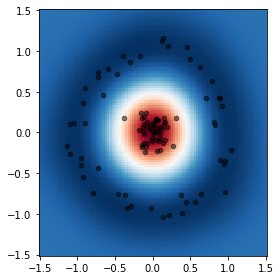

In [8]:
fig, ax = plt.subplots(figsize=(4, 4), tight_layout=True)
plot_decision_boundary(validator, ax)

:::{seealso}

Puede revisar ejemplos similares en la documentación de scikit-learn:

- [SVM margin](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py)
- [RBF parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)
- [SVM kernels](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)

También puede profundizar en las variantes del algoritmo SVM [aquí](https://docs.google.com/presentation/d/1IZZ6Ng9KG6HgS7tNy5fOHh0g4vJASR5M24tIFehAFXo/edit#slide=id.g25b8815c7a_0_35).

:::